In [2]:
# build price
prices = pd.read_csv('prices_data.csv', delimiter=';')
prices['date'] = pd.to_datetime(prices.date)
prices = prices.set_index('date').replace(0, np.nan)
prices.head()

,DU UH Equity,SCL LN Equity,BMA AR Equity,GCLA AR Equity,EBS AV Equity,OMV AV Equity,VER AV Equity,ABP AU Equity,AGL AU Equity,AHY AU Equity,...,SPG SJ Equity,PPC SJ Equity,0MC2 LN Equity,RCL SJ Equity,RDF SJ Equity,HYP SJ Equity,AEL SJ Equity,MRP SJ Equity,EMI SJ Equity,AXL SJ Equity
date,,,,,,,,,,,,,,,,,,,,,
1996-12-31,NaN,NaN,9.35256,NaN,NaN,11.11470,7.40014,NaN,NaN,NaN,...,6.03469,0.95932,NaN,0.89318,NaN,1.25522,1.06860,0.75895,NaN,0.36700
1997-01-30,NaN,NaN,9.68044,NaN,NaN,11.34016,7.29655,NaN,NaN,NaN,...,6.86283,1.06935,NaN,1.20625,NaN,1.25426,1.23754,0.74472,NaN,0.40870
1997-02-27,NaN,NaN,9.99271,NaN,NaN,11.75658,7.26890,NaN,NaN,NaN,...,8.92603,1.23399,NaN,1.00673,NaN,1.21265,1.25000,0.58482,NaN,0.49981
1997-03-31,NaN,NaN,11.00760,NaN,NaN,11.82128,7.16293,NaN,NaN,NaN,...,9.57722,1.21798,NaN,1.15977,NaN,1.27312,1.60597,0.73513,NaN,0.42375
1997-04-30,NaN,NaN,10.81243,NaN,NaN,10.88544,6.98641,NaN,NaN,NaN,...,8.37680,1.12181,NaN,1.06734,NaN,1.24338,1.73112,0.79811,NaN,0.46649


In [50]:
factor = pd.read_csv('shares_data.csv', delimiter=';')
factor['date'] = pd.to_datetime(factor.date)
factor = factor.set_index('date').stack().replace(0, np.nan)
factor.head()

date                     
1997-12-31  BMA AR Equity    0.319427
            EBS AV Equity    0.067873
            OMV AV Equity         NaN
            VER AV Equity         NaN
            AWC AU Equity    0.008834
            BHP AU Equity    0.027498
            BKW AU Equity         NaN
            BPT AU Equity    0.114677
            CBA AU Equity   -0.008116
            CCL AU Equity    0.439502
            CSR AU Equity    0.022679
            CTX AU Equity         NaN
            DOW AU Equity    3.450450
            FXJ AU Equity    0.049134
            GNC AU Equity         NaN
            GPT AU Equity    0.116900
            GWA AU Equity    0.021194
            KCN AU Equity    0.099820
            MQG AU Equity    0.040379
            NCM AU Equity    0.000190
            OZL AU Equity    0.247518
            PDN AU Equity    0.352128
            QAN AU Equity    0.057352
            QBE AU Equity    0.030499
            RIO AU Equity   -0.201644
            SGM AU Equit

In [52]:
# Ingest and format data  
factor_data = get_clean_factor_and_forward_returns(factor,
                                                   prices,
                                                   quantiles=3,
                                                   periods=(6, 12, 60),
                                                   max_loss=1)

factor_extract = factor_data.drop(['12D', '6D', '60D', 'factor'], axis=1) #'24D', '36D', '48D', '60D', 'factor'
factor_extract.unstack().head()

Dropped 45.9% entries from factor data: 45.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!


factor_quantile                                            \
asset        BMA AR Equity EBS AV Equity AWC AU Equity BHP AU Equity   
date                                                                   
1997-12-31             5.0           4.0           3.0           4.0   
1998-01-29             5.0           4.0           3.0           4.0   
1998-02-26             5.0           4.0           3.0           4.0   
1998-03-31             5.0           4.0           3.0           4.0   
1998-04-30             5.0           4.0           3.0           4.0   

                                                                    \
asset      BPT AU Equity CBA AU Equity CCL AU Equity CSR AU Equity   
date                                                                 
1997-12-31           5.0           1.0           5.0           4.0   
1998-01-29           5.0           1.0           5.0           4.0   
1998-02-26           5.0           1.0           5.0           4.0   
1998-03-31           5.0           1.0           5.0           4.0   
1998-04-30           5.0           1.0           5.0           4.0   

                                        ...                              \
asset      DOW AU Equity FXJ AU Equity  ... CWD LN Equity CCH LN Equity   
date                                    ...                               
1997-12-31           5.0           4.0  ...           NaN           NaN   
1998-01-29           5.0           4.0  ...           NaN           NaN   
1998-02-26           5.0           4.0  ...           NaN           NaN   
1998-03-31           5.0           4.0  ...           NaN           NaN   
1998-04-30           5.0           4.0  ...           NaN           NaN   

                                                                      \
asset      DOO CN Equity MEL NZ Equity SCP AU Equity BPOST BB Equity   
date                                                                   
1997-12-31           NaN           NaN           NaN             NaN   
1998-01-29           NaN           NaN           NaN             NaN   
1998-02-26           NaN           NaN           NaN             NaN   
1998-03-31           NaN           NaN           NaN             NaN   
1998-04-30           NaN           NaN           NaN             NaN   

                                                                        
asset      MDC LN Equity LALAB MM Equity CNHI US Equity WWAV US Equity  
date                                                                    
1997-12-31           NaN             NaN            NaN            NaN  
1998-01-29           NaN             NaN            NaN            NaN  
1998-02-26           NaN             NaN            NaN            NaN  
1998-03-31           NaN             NaN            NaN            NaN  
1998-04-30           NaN             NaN            NaN            NaN  

[5 rows x 1183 columns]

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-5.655138,0.000013,-0.082611,0.297366,29129,20.066823
2,-0.013218,0.003963,-0.000271,0.002298,28973,19.959355
3,0.000121,0.016170,0.004397,0.002949,29019,19.991044
4,0.003935,0.124270,0.022728,0.018499,28976,19.961422
5,0.022737,11.910327,0.315250,0.568537,29063,20.021356


Returns Analysis


,6D,12D,60D
Ann. alpha,0.392,-0.022,-0.858
beta,0.160,0.195,0.733
Mean Period Wise Return Top Quantile (bps),203.741,177.655,912.587
Mean Period Wise Return Bottom Quantile (bps),-54.825,-47.813,-314.869
Mean Period Wise Spread (bps),258.566,209.338,380.924


C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)
C:\Users\lucas\Anaconda3\lib\site-packages\alphalens\performance.py:455: RuntimeWarning: invalid value encountered in double_scalars
  return ((np.nansum(ret) + 1)**(1. / period)) - 1


<Figure size 432x288 with 0 Axes>

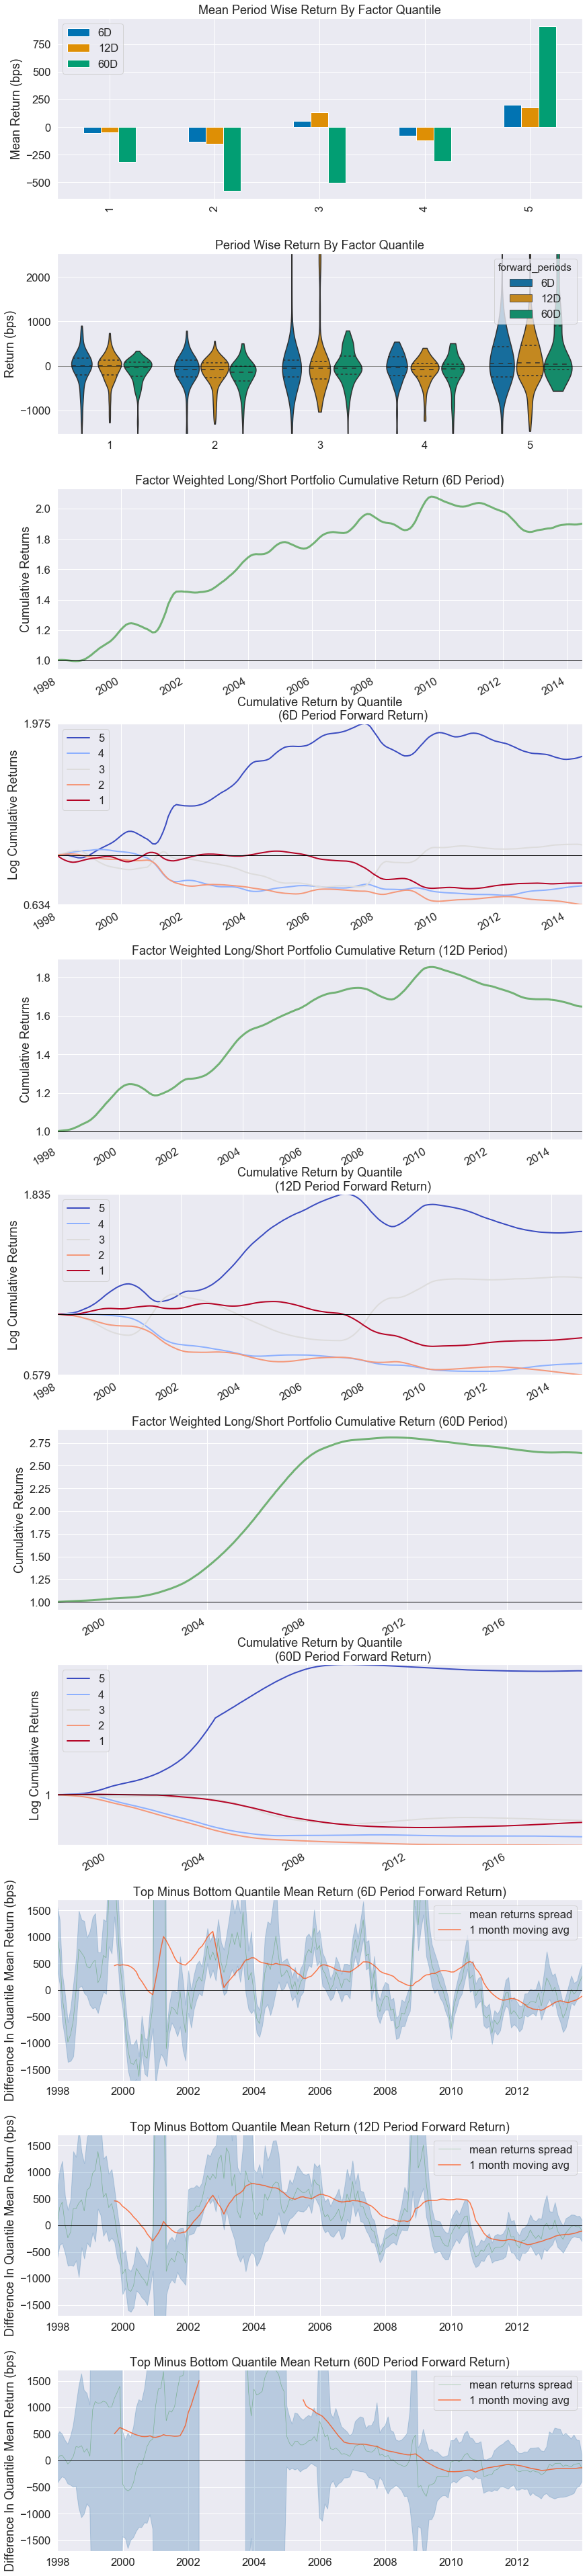

Information Analysis


,6D,12D,60D
IC Mean,-0.017,-0.025,-0.034
IC Std.,0.068,0.075,0.060
Risk-Adjusted IC,-0.256,-0.330,-0.575
t-stat(IC),-3.554,-4.583,-7.984
p-value(IC),0.000,0.000,0.000
IC Skew,-0.420,-0.398,0.359
IC Kurtosis,-0.059,-0.241,0.058


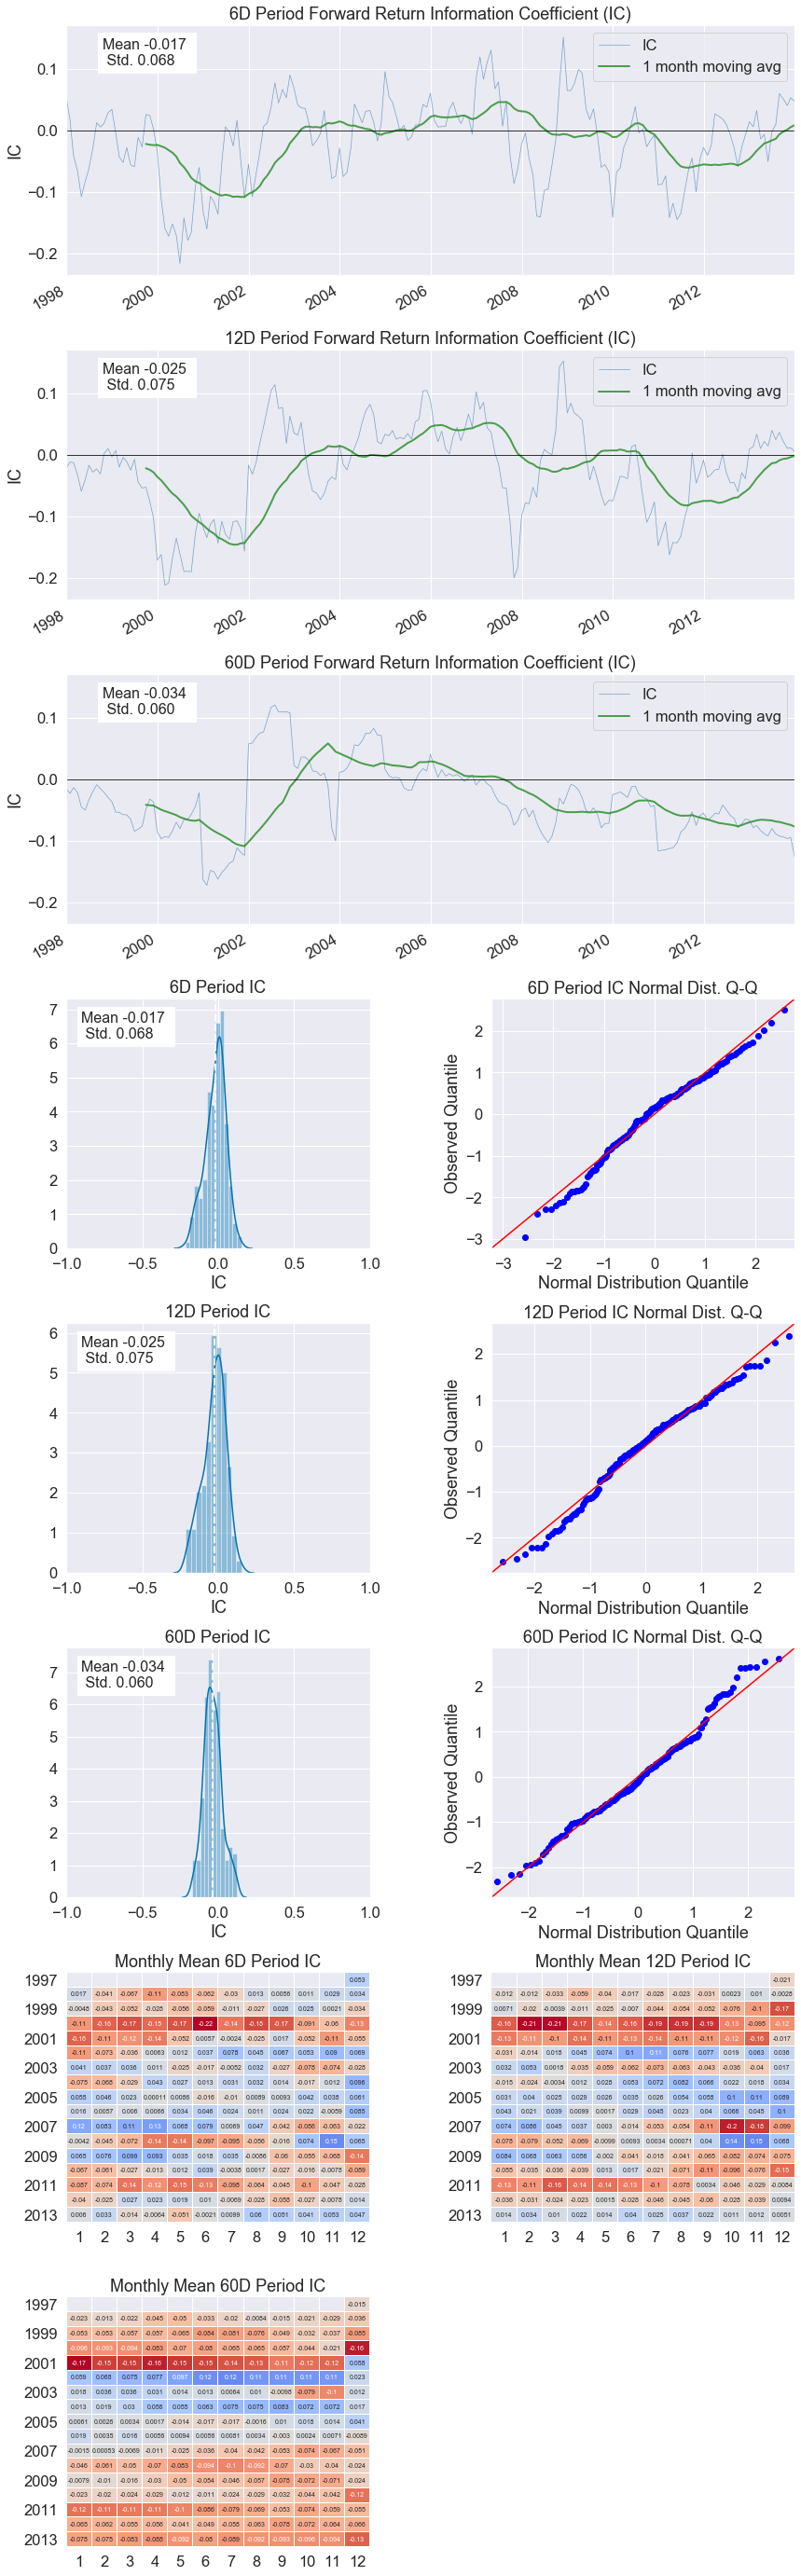

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


Turnover Analysis


,12D,60D,6D
Quantile 1 Mean Turnover,0.605,0.777,0.297
Quantile 2 Mean Turnover,0.668,0.799,0.329
Quantile 3 Mean Turnover,0.669,0.786,0.330
Quantile 4 Mean Turnover,0.679,0.801,0.336
Quantile 5 Mean Turnover,0.718,0.801,0.354


,6D,12D,60D
Mean Factor Rank Autocorrelation,0.675,0.332,0.189


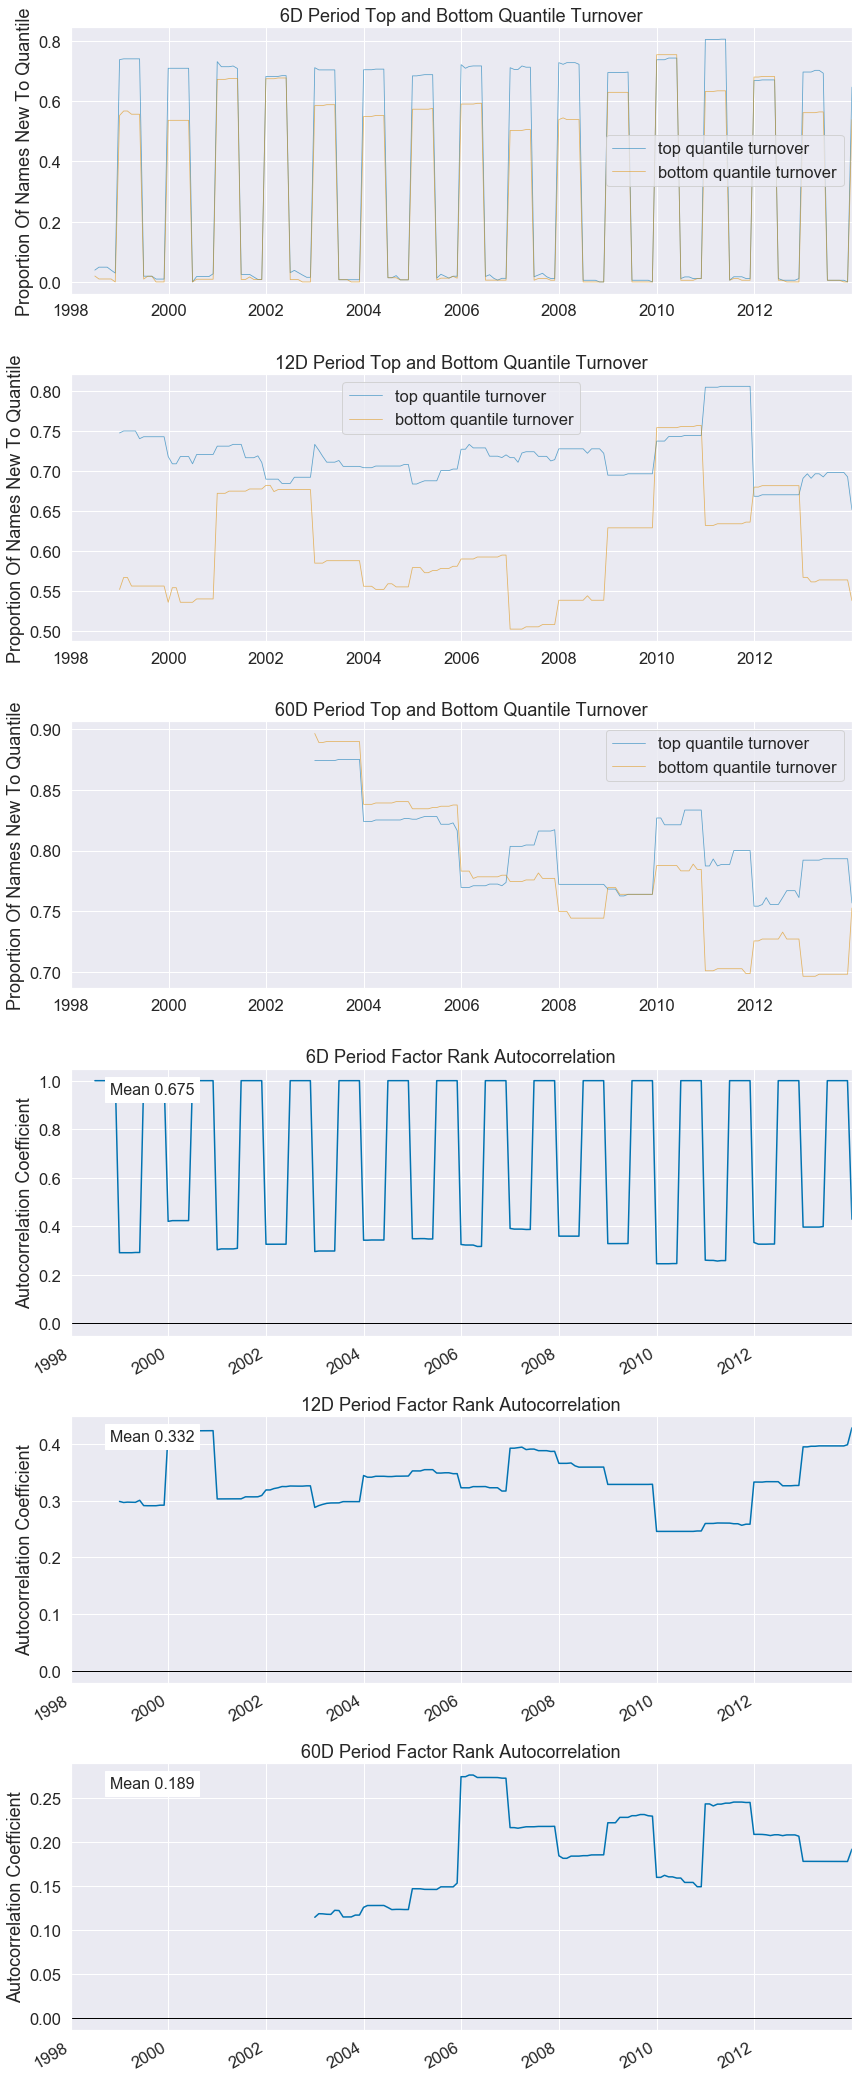

<Figure size 432x288 with 0 Axes>

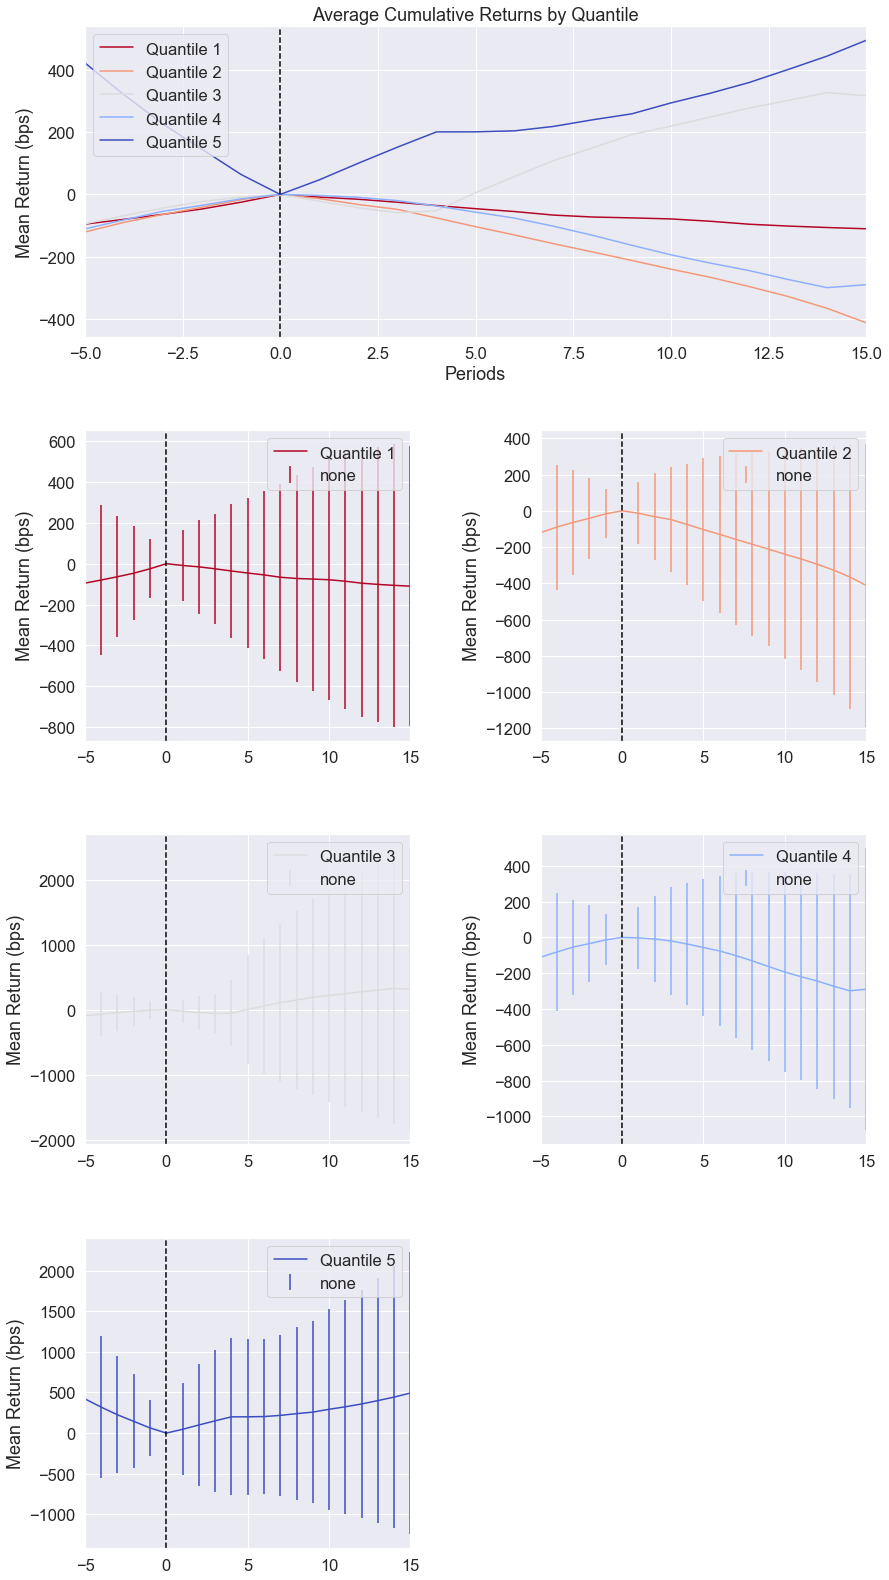

In [53]:
create_full_tear_sheet(factor_data, long_short=True,)
create_event_returns_tear_sheet(factor_data, prices,long_short=True)